In [152]:
# !pip install imbalanced-learn
# !pip install seaborn

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn
from imblearn.over_sampling import SMOTE
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Importation données


In [15]:
#importation des données
df_data = pd.read_csv('./data/train.csv', sep=';')

df_data['color'].value_counts()
# print(df_data)
# One-hot encoding
df_data = pd.get_dummies(df_data)
column_list = ['id', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'color_red', 'color_white','quality']

# good_columns = ['chlorides', 'volatile acidity', 'density', 'alcohol']
# column_names = {'0':'id', '1':'fixed acidity', '2':'volatile acidity', '3':'citric acid',
#        '4':'residual sugar', '5':'chlorides', '6':'free sulfur dioxide',
#        '7':'total sulfur dioxide', '8':'density', '9':'pH', '10':'sulphates', 'alcohol',
#        'color_red', 'color_white','quality'}
df_data = df_data[column_list]

df_data = df_data[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']]
# df_data = df_data[['alcohol', 'volatile acidity', 'free sulfur dioxide',
#                    'sulphates', 'residual sugar', 'pH', 'total sulfur dioxide', 
#                    'chlorides', 'density','quality']]
print(df_data['quality'].value_counts())
print(len(df_data))

y = np.array(df_data['quality'])
X = df_data.drop('quality', axis=1)
feature_list = list(X.columns)
X = np.array(X)
# y = df_data.iloc[:, df_data.shape[1]-1].values
# X = df_data.iloc[:, 0:df_data.shape[1]-1].values

print(len(X))
print(len(y))
df_data

6    1998
5    1500
7     739
4     154
8     133
3      21
9       2
Name: quality, dtype: int64
4547
4547
4547


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.4,0.13,0.47,1.6,0.092,40.0,158.0,0.99280,3.21,0.36,9.8,6
1,6.2,0.33,0.14,4.8,0.052,27.0,128.0,0.99475,3.21,0.48,9.4,5
2,6.3,0.32,0.32,1.5,0.030,24.0,101.0,0.98923,3.21,0.42,13.0,5
3,6.6,0.16,0.34,1.1,0.037,41.0,115.0,0.98990,3.01,0.68,12.0,6
4,6.3,0.26,0.42,7.1,0.045,62.0,209.0,0.99544,3.20,0.53,9.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4542,7.1,0.18,0.32,12.2,0.048,36.0,125.0,0.99670,2.92,0.54,9.4,6
4543,7.9,0.26,0.33,10.3,0.039,73.0,212.0,0.99690,2.93,0.49,9.5,6
4544,7.3,0.22,0.37,14.3,0.063,48.0,191.0,0.99780,2.89,0.38,9.0,6
4545,7.2,0.51,0.24,10.0,0.093,35.0,197.0,0.99810,3.41,0.47,9.0,5


# Traitement des données

## Imbalanced Dataset

In [26]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

print(pd.DataFrame(data=y).value_counts())
ros = RandomOverSampler(random_state=0)
ros.fit(X,y)
X_resampled, y_resampled = ros.fit_resample(X,y)

dfXx = pd.DataFrame(data=X_resampled)
dfy = pd.DataFrame(data=y_resampled)

print(dfy.value_counts())
# y = np.array(dfy)
# X = np.array(dfXx)

print(len(y))
print(len(X))

6    1998
5    1500
7     739
4     154
8     133
3      21
9       2
dtype: int64
3    1998
4    1998
5    1998
6    1998
7    1998
8    1998
9    1998
dtype: int64
4547
4547


## Feature Selection

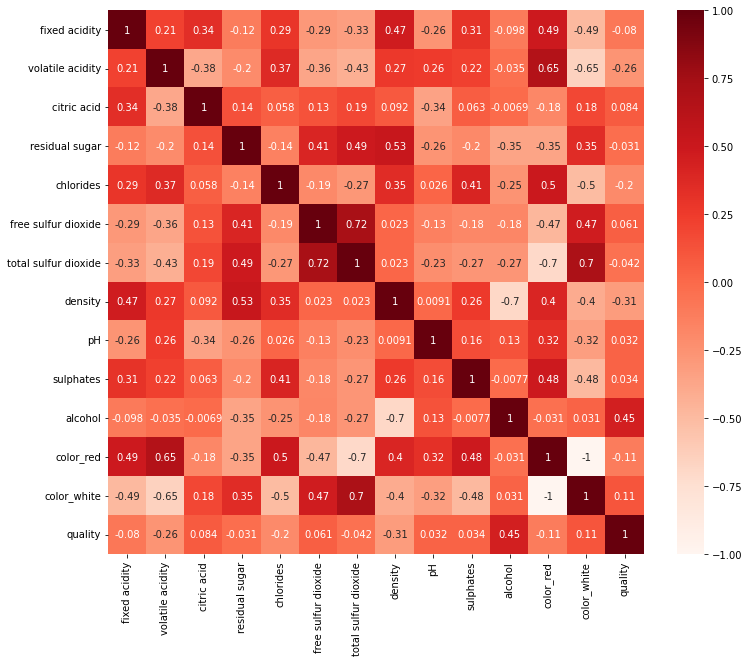

residual sugar          0.031239
pH                      0.032368
sulphates               0.034438
total sulfur dioxide    0.041837
free sulfur dioxide     0.060798
fixed acidity           0.080260
citric acid             0.083584
color_white             0.111778
color_red               0.111778
chlorides               0.196164
volatile acidity        0.262429
density                 0.306301
alcohol                 0.445358
quality                 1.000000
Name: quality, dtype: float64

In [4]:
plt.figure(figsize=(12,10))
cor = df_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Correlation with output variable
cor_target = abs(cor["quality"])
cor_target.sort_values()
# #Selecting highly correlated features
# relevant_features = cor_target[cor_target>0.10]
# relevant_features




In [11]:

X_train, X_test, label_train, label_test = train_test_split(X,y, test_size=0.2, random_state=0)
#Entrainement du model de regression
model = RandomForestClassifier(n_estimators=1000, random_state=0)
model.fit(X_train, label_train)
#listing feature importance
# Get numerical feature importances
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance,4)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]


# df_data = df_data[['alcohol', 'volatile acidity', 'free sulfur dioxide',
#                    'sulphates', 'residual sugar', 'pH', 'total sulfur dioxide', 
#                    'chlorides', 'density']]

Variable: alcohol              Importance: 0.1249
Variable: density              Importance: 0.1011
Variable: volatile acidity     Importance: 0.1007
Variable: total sulfur dioxide Importance: 0.0903
Variable: free sulfur dioxide  Importance: 0.0864
Variable: sulphates            Importance: 0.0856
Variable: chlorides            Importance: 0.0841
Variable: residual sugar       Importance: 0.0835
Variable: pH                   Importance: 0.0817
Variable: citric acid          Importance: 0.079
Variable: fixed acidity        Importance: 0.0767
Variable: color_red            Importance: 0.0031
Variable: color_white          Importance: 0.003


[None, None, None, None, None, None, None, None, None, None, None, None, None]

# Hyper Parameter tuning

In [11]:
X_train, X_test, label_train, label_test = train_test_split(X,y, test_size=0.2, random_state=0)

#Entrainement du model de regression
#create regressor object
model = RandomForestClassifier(random_state=42)
# model.fit(X_train, label_train)
#dict of hyperparameter
param_grid = { 
    'n_estimators': [500, 1000, 5000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

In [12]:
from sklearn.model_selection import GridSearchCV
GS = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
GS.fit(X_train, label_train)

C:\Users\j-mla\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [500, 1000, 5000]})

In [13]:
print('Best estimator: ',GS.best_estimator_)
print('------------------------------')
print('Best params', GS.best_params_)
print('------------------------------')
print('Best score', GS.best_score_)

Best estimator:  RandomForestClassifier(n_estimators=500, random_state=42)
------------------------------
Best params {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 500}
------------------------------
Best score 0.6332156839034419


In [25]:
print(GS.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


In [26]:
print(GS.best_score_)

0.5933442417280107


### Feature Selection: Backward elemination

# RandomForestClassifier

In [16]:
X_train, X_test, label_train, label_test = train_test_split(X,y, test_size=0.2, random_state=0)

#Entrainement du model de regression
#create regressor object
model = RandomForestClassifier(n_estimators=5000, random_state=42, criterion="entropy", max_features="auto" )
model.fit(X_train, label_train)

RandomForestClassifier(n_estimators=5000, random_state=42)

# Predictions on validation set

In [17]:
#predictions

label_pred = model.predict(X_test)
# label_pred.round()

In [7]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(label_test, label_pred))
print('Mean Squared Error:', metrics.mean_squared_error(label_test, label_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(label_test, label_pred)))

print('Score: ', model.score(X_test, label_test))

label_pred = label_pred.round()

good_pred = 0
for i in range(len(label_pred)):
    if label_pred[i] == label_test[i]:
        good_pred += 1
print('Accuracy: ', good_pred, ' / ', len(label_pred), ' = ', good_pred/len(label_pred))

Mean Absolute Error: 0.3868131868131868
Mean Squared Error: 0.4879120879120879
Root Mean Squared Error: 0.6985070421349293
Score:  0.6582417582417582
Accuracy:  599  /  910  =  0.6582417582417582


# Prédiction pour la soumission

In [18]:
import time
timestr = time.strftime("%Y%m%d-%H%M%S")

x_public = pd.read_csv('./data/test_public.csv', sep=';')
x_public = pd.get_dummies(x_public)
x_public = x_public[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

label_pred = model.predict(x_public.values)

label_pred = [int(a) for a in label_pred]
id_list = np.arange((len(label_pred)))
dict = {'id': id_list, 'quality': label_pred}
df = pd.DataFrame(dict) 
df.to_csv('./data/submissions/submission_rf_'+timestr+'.csv', index=False) 